In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement du dataset

Lecture du dataset

In [2]:
df = pd.read_csv('./datasets/mall_customers.csv');

Prevoir la structure du dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Prevoir les données du dataset

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Voir le nombre de ligne

In [5]:
df.shape

(200, 5)

## Nettoyage et prétraitement

Verifier s'il y a des valeurs manquantes


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Nous n'avons aucun valeur manquante.

## Analyse exploratoire des données (EDA)

C'est le processus d'analyse et de visualisation d'un ensemble de données afin de résumer ses principales caractéristiques, de détecter des modèles et de découvrir des idées avant d'appliquer des modèles d'apprentissage automatique (comme le clustering). Elle vous aide à comprendre vos données et à prendre des décisions éclairées en matière de prétraitement et de modélisation.

### EDA univariée

Histogrammes et boxplots de chaque variable.

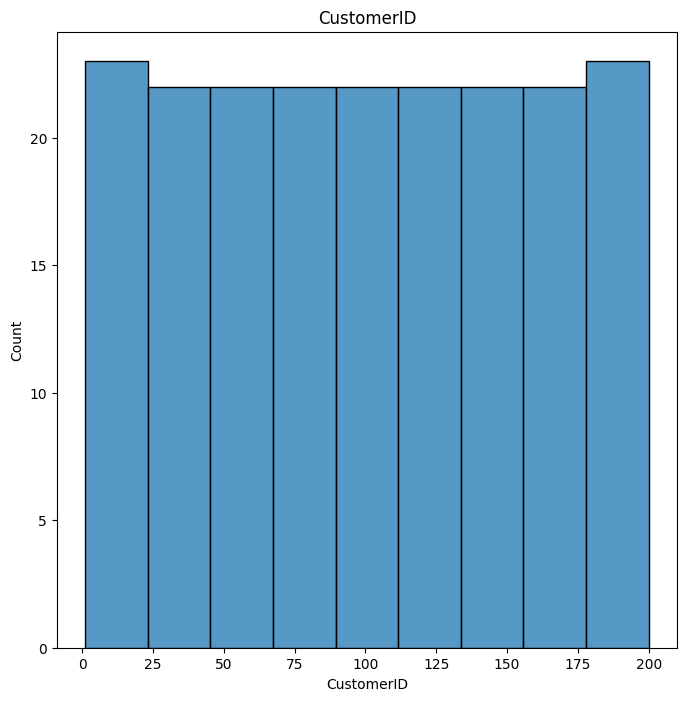

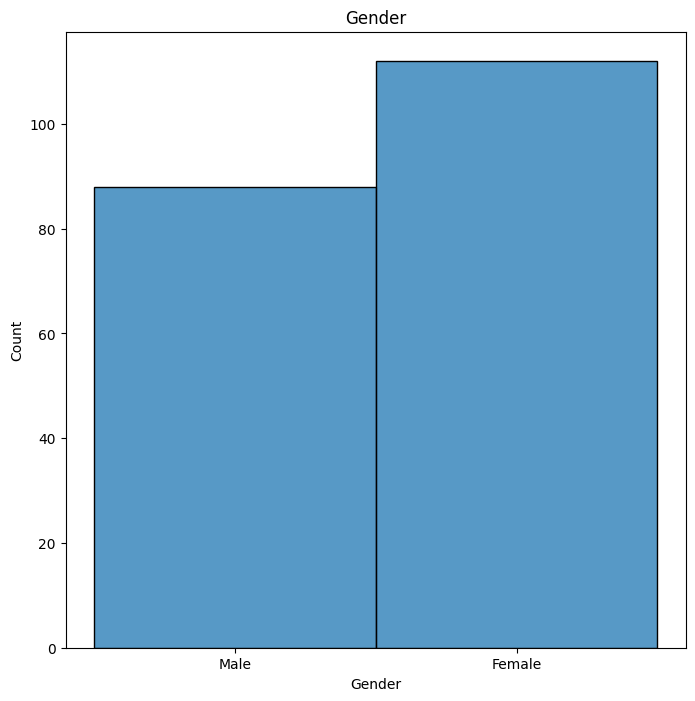

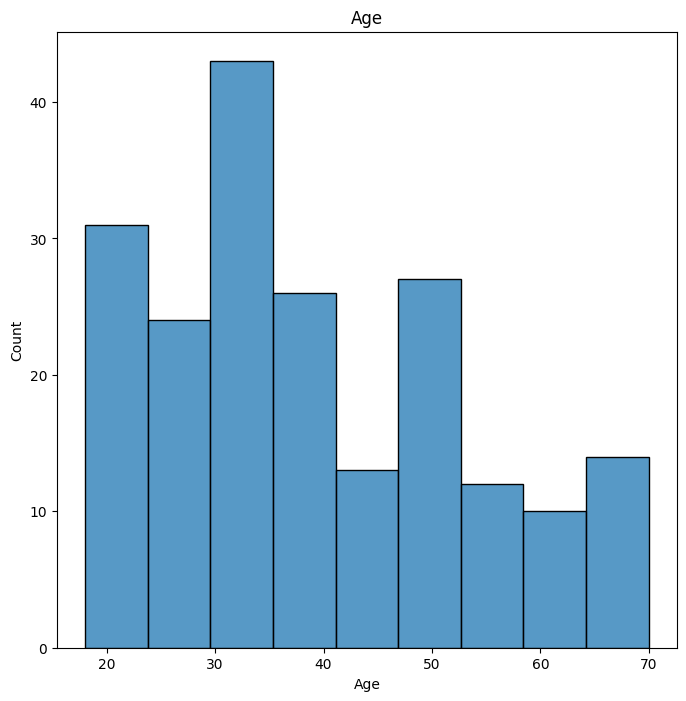

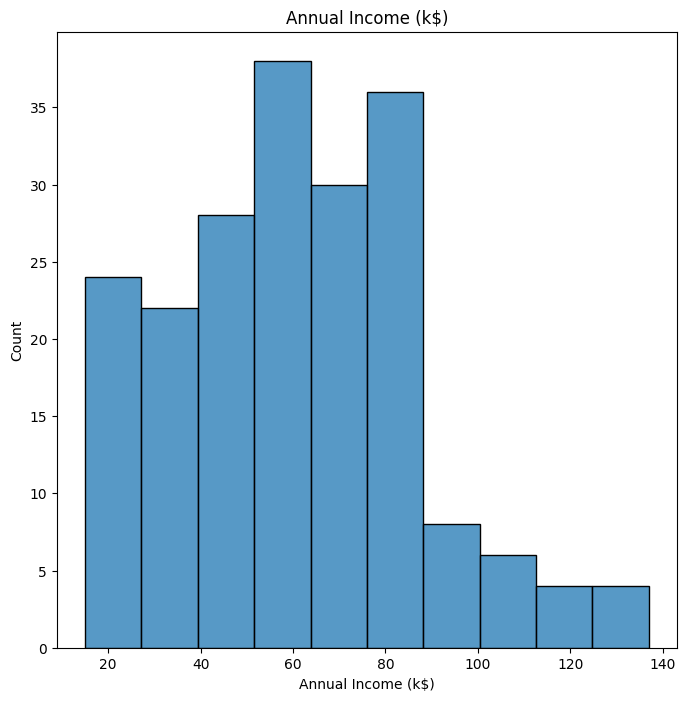

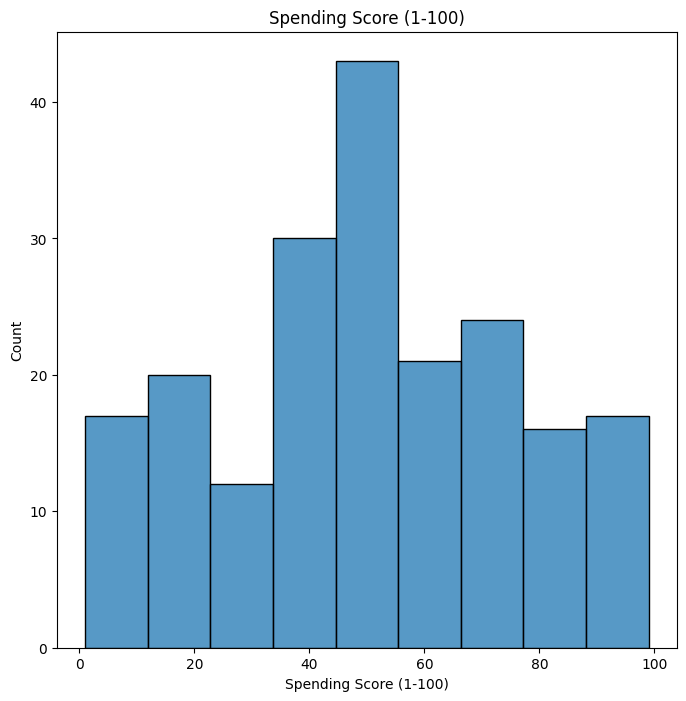

In [8]:
cols = df.columns

for col in cols:
    plt.figure(figsize=(8,8))
    sns.histplot(data=df, x=col)
    plt.title(col)
    plt.show()

2. Boxplots pour chaque variables.

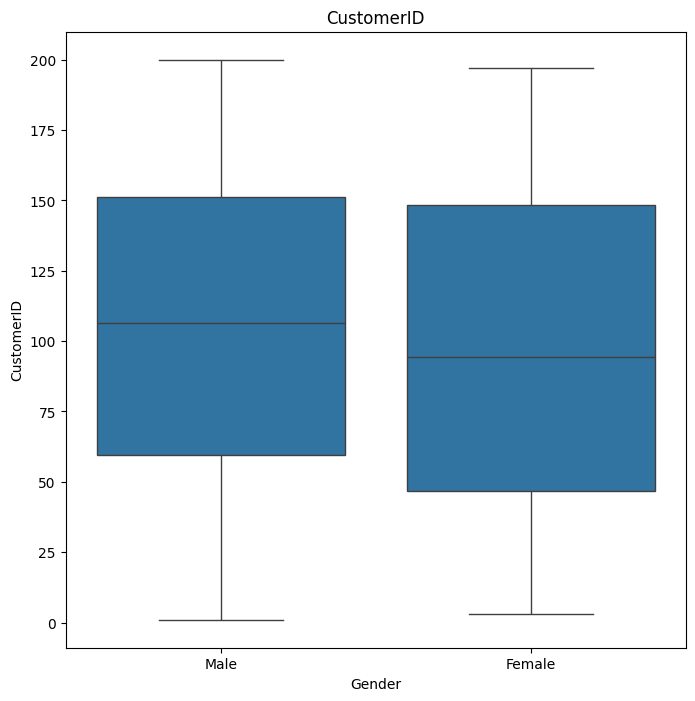

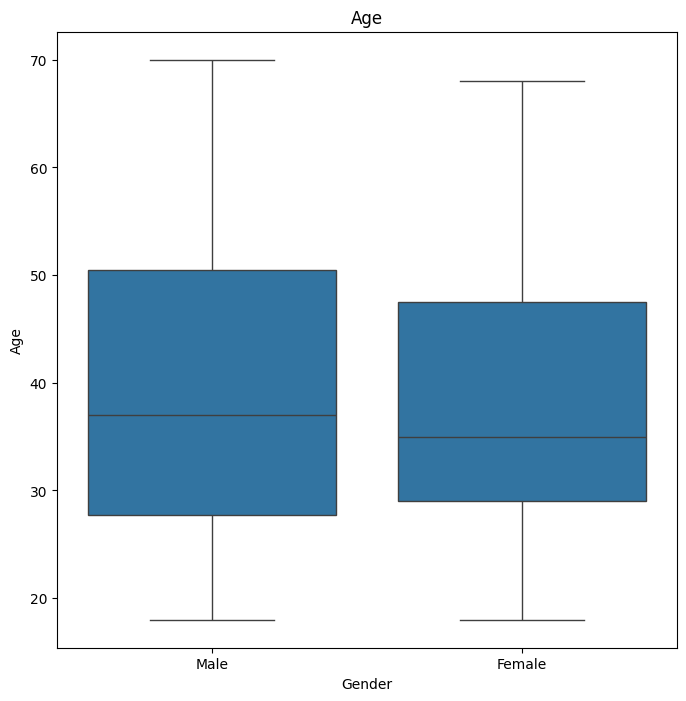

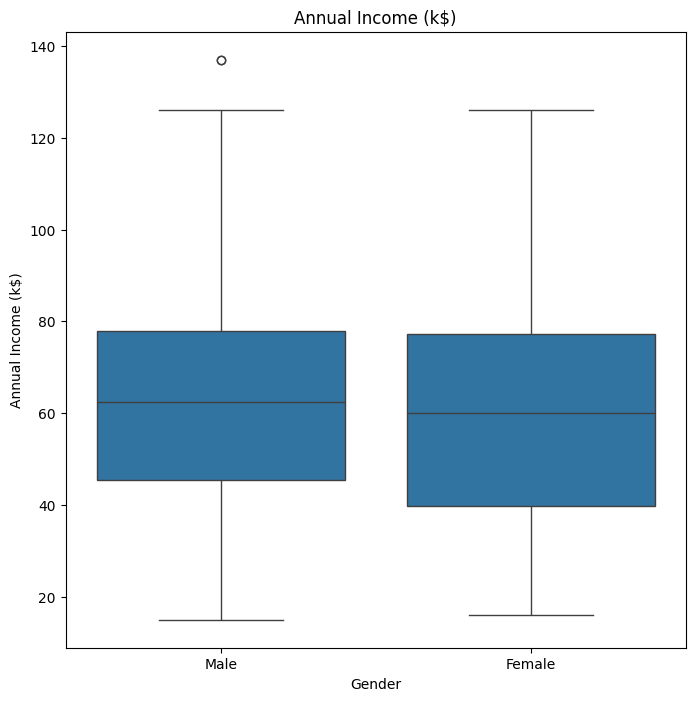

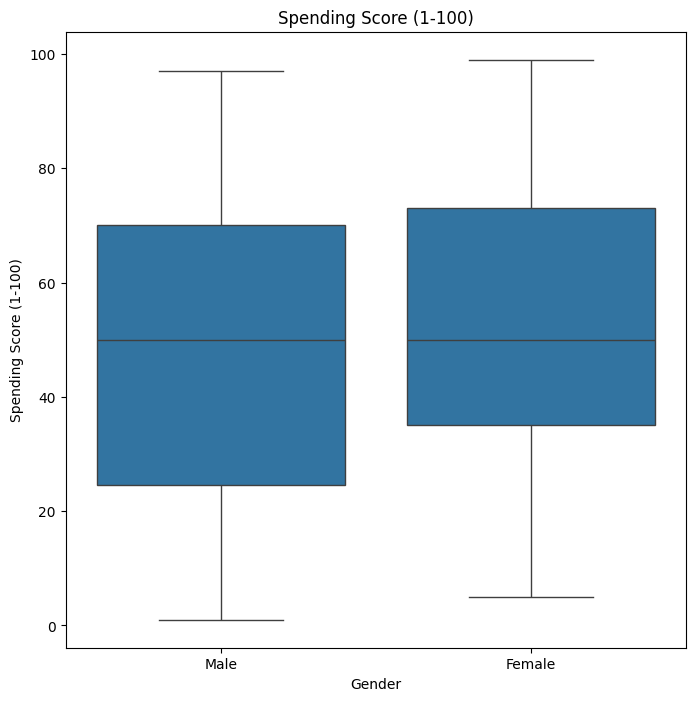

In [9]:
for col in cols:
    if (col != 'Gender'):
        plt.figure(figsize=(8,8))
        sns.boxplot(data=df, y=col, x='Gender')
        plt.title(col)
        plt.show()

### EDA mutlivariée

Scatter plot de la relation entre age et revenue annuel.

On peut voir que ...

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

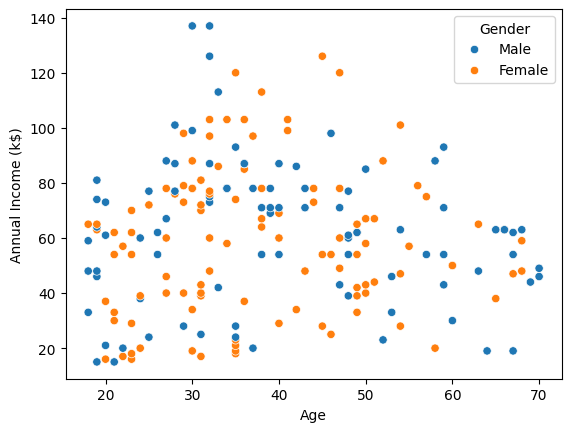

In [10]:
sns.scatterplot(x="Age", y="Annual Income (k$)", data=df, hue='Gender')

Scatter plot de la relation entre age et score de depense.

On peut voir que plus l'age est petit plus le score de depense est élevé.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

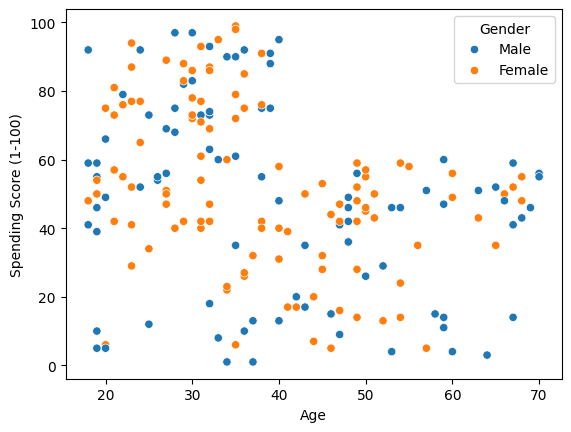

In [11]:
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=df, hue='Gender')

Scatter plot de la relation entre revenue annuel et score de depense.

On peut voir que plus l'age est petit plus le score de depense est élevé.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

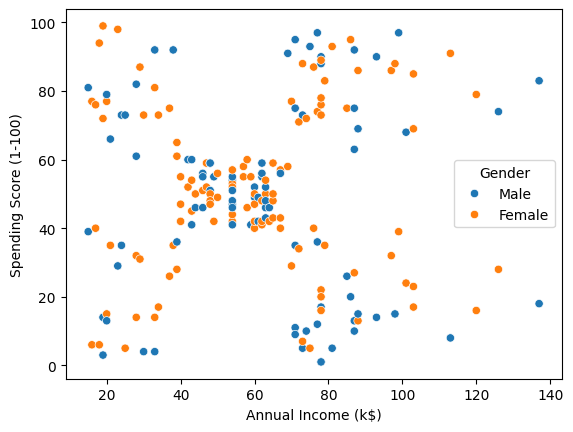

In [12]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue='Gender')

### Matrice de correlation

1. Suppression de la colonne `CustomerID` car qu'elle n'est d'aucunne utilitée informative.

In [28]:
df = df.drop('CustomerID',axis= 1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


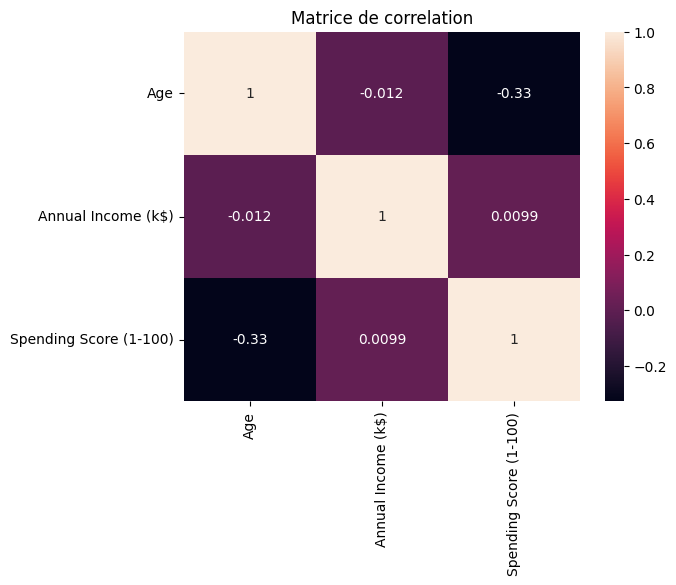

In [29]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title("Matrice de correlation")
plt.show()

## Feature engineering


1. Creation de classe d'ages et nombre de personne par classe d'ages.

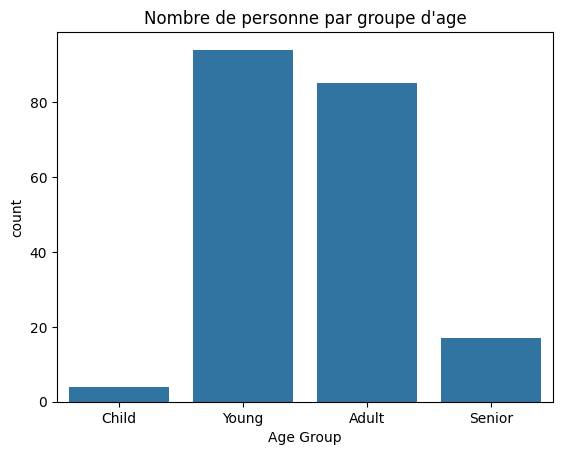

In [30]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young', 'Adult', 'Senior'])
# df['Age Group'].value_counts()

sns.countplot(data=df, x='Age Group')
plt.title("Nombre de personne par groupe d'age")
plt.show()

## Reduction de dimension et PCA

Application d'une PCA (Principal Component Analysis) pour visualiser les données en 2D.

1. Standarisation des valeurs.

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]);

2. Application du PCA

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

3. Visulalisation en 2D

<Axes: >

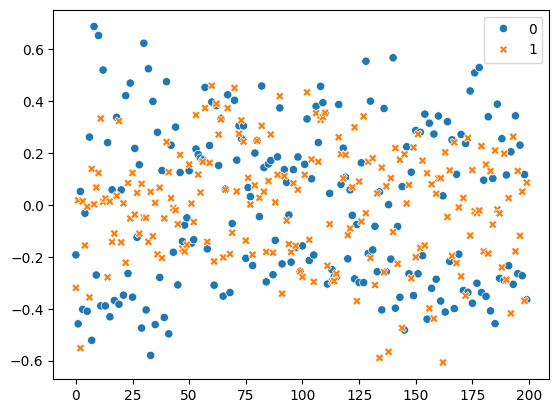

In [33]:
sns.scatterplot(data=pca_data)

## Clustering: K-means

1. Methode **Elbow**

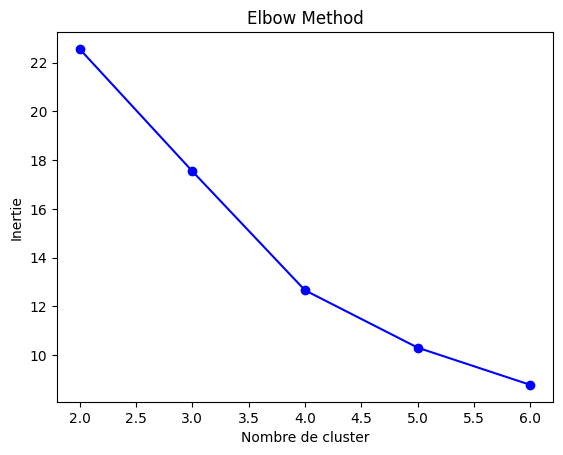

In [34]:
from sklearn.cluster import KMeans
inertia = []
K_range = range(2, 7)

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.ylabel("Inertie")
plt.xlabel("Nombre de cluster")
plt.title("Elbow Method")
plt.show()

Nous pouvons voir que le nombre de cluster `5` est le nombre ou l'inertie descent lentement. 

2. Methode **Silouhette**

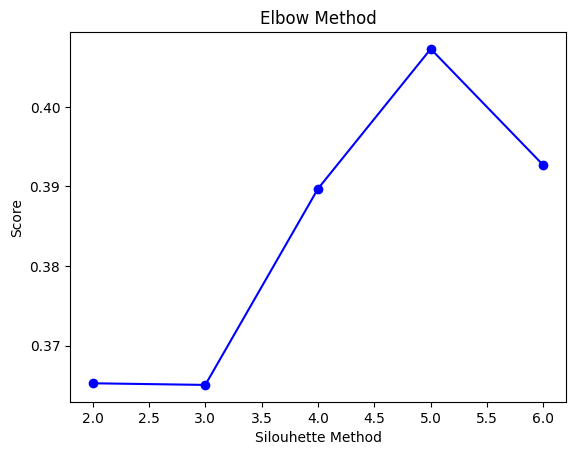

In [35]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    scores.append(score)
    
plt.plot(K_range, scores, 'bo-')
plt.ylabel("Score")
plt.xlabel("Silouhette Method")
plt.title("Elbow Method")
plt.show()

D'apres les deux methodes le nombre de cluster est `5`.

3. Creation du **model KMeans**.

In [50]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Cluster
0,Male,19,15,39,Young,0
1,Male,21,15,81,Young,0
2,Female,20,16,6,Young,0
3,Female,23,16,77,Young,0
4,Female,31,17,40,Young,0


4. Visualisation en 2D

<Axes: >

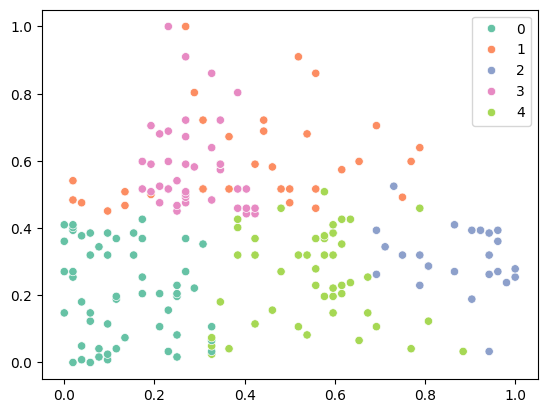

In [51]:
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters, palette='Set2')